In [ ]:
# Standard library imports
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler

# Import SciREX KMeans model
from scirex.core.ml.unsupervised.clustering.kmeans import Kmeans

: 

In [24]:
def run(model, X, dataset_name: str):
    """
    Helper function to run the clustering model,print the metrics and display the plot
     
    """
    results = model.run(data=X)

    # Print metrics
    print(f"\n--- {model.model_type.upper()} on {dataset_name} dataset ---")
    print(f"Silhouette Score:      {results['silhouette_score']:.3f}")
    print(f"Calinski-Harabasz:     {results['calinski_harabasz_score']:.3f}")
    print(f"Davies-Bouldin:        {results['davies_bouldin_score']:.3f}")
    print(f"Time taken:            {results['time_taken']:.3f}s")

    if hasattr(model, "n_clusters"):
        print(f"Number of clusters:    {model.n_clusters}")

    # Call .plots(...) from base.py to create & save the figure
    fig, plot_path = model.plots(X, model.labels)

    # Read the saved PNG from disk and display inline
    if not os.path.exists(plot_path):
        print(f"[WARNING] Plot file not found: {plot_path}")
    else:
        img = mpimg.imread(plot_path)
        plt.figure(figsize=(7, 5))
        plt.imshow(img)
        plt.title(f"{model.model_type.upper()} Clustering Plot for {dataset_name}", fontsize=14)
        plt.axis("off")
        plt.show()

Optimal k from silhouette score: 4
Optimal k from elbow method: 3

Choose k for the model?
1: Silhouette method
2: Elbow method
3: Input custom value

KMeans fitted with 3 clusters

--- KMEANS on blobs dataset ---
Silhouette Score:      0.738
Calinski-Harabasz:     3479.989
Davies-Bouldin:        0.376
Time taken:            8.933s
Number of clusters:    3


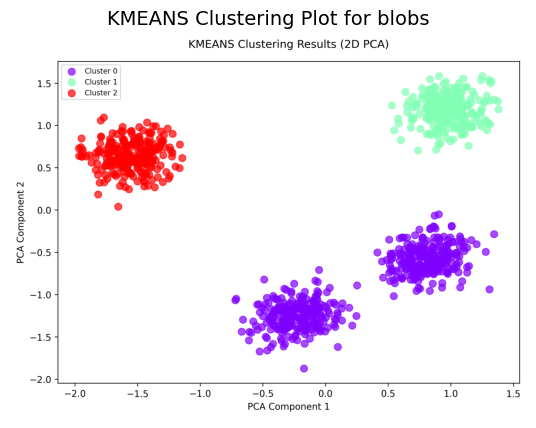

Optimal k from silhouette score: 10
Optimal k from elbow method: 4

Choose k for the model?
1: Silhouette method
2: Elbow method
3: Input custom value

KMeans fitted with 4 clusters

--- KMEANS on moons dataset ---
Silhouette Score:      0.429
Calinski-Harabasz:     1230.080
Davies-Bouldin:        0.900
Time taken:            8.405s
Number of clusters:    4


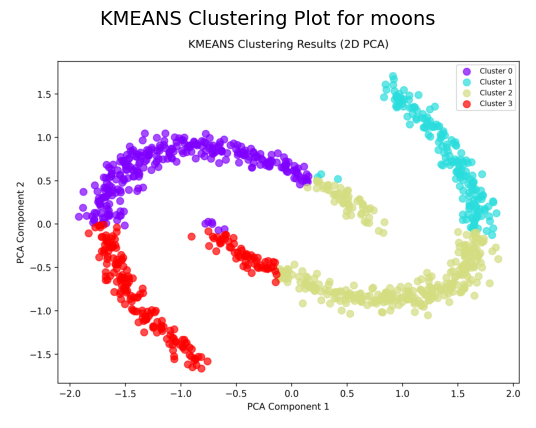

In [25]:
X_blobs, _ = make_blobs(n_samples=1000, centers=4, random_state=42)
X_blobs = StandardScaler().fit_transform(X_blobs)

X_moons, _ = make_moons(n_samples=1000, noise=0.05, random_state=42)
X_moons = StandardScaler().fit_transform(X_moons)

# Instantiate two separate KMeans
kmeans_blobs = Kmeans(max_k=10)
kmeans_moons = Kmeans(max_k=10)
    
# Run on blobs
run(kmeans_blobs, X_blobs, "blobs")

# Run on moons
run(kmeans_moons, X_moons, "moons")